# Introdução a Ciência dos Dados - Atividade 2

<span style="position: absolute; top: 10px; right: 10px; background: green; padding: 0.5em; color: white; border-radius: 0.25em; font-weight: bold">Vaux Gomes</span>

## Métodos de Análise Estatística dos Dados

#### Bibliotecas

In [179]:
# Imports
import math
import scipy.special as scsp
from scipy.stats import ksone

import numpy as np
import pandas as pd
import seaborn as sn

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Loading

In [44]:
df = pd.read_csv('../data/iphone-olx-ce.csv', index_col=0)
df.shape

(1194, 17)

In [45]:
columns = ['region', 'areaCode', 'eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition']
df[columns] = df[columns].astype('category')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, 0 to 1531
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   adDate               1194 non-null   float64 
 1   region               1194 non-null   category
 2   zipcode              1194 non-null   int64   
 3   areaCode             1194 non-null   category
 4   category             1194 non-null   object  
 5   paidPromotion        1194 non-null   bool    
 6   subject              1194 non-null   object  
 7   eletronicsModel      1194 non-null   category
 8   storage              1194 non-null   category
 9   color                1194 non-null   category
 10  batteryHealth        1194 non-null   category
 11  eletronicsCondition  1194 non-null   category
 12  price                1194 non-null   float64 
 13  pictures             1194 non-null   float64 
 14  sellerName           1194 non-null   object  
 15  storageGB            1194 

#### Adjustando Data

In [47]:
df.adDate = pd.to_datetime(df.adDate, unit='s')
df.adDate[0]

Timestamp('2023-05-24 21:10:08')

#### Ajustando Pictures

O número máximo de imagens em um anúncio do OLX é de 6 imagens, com exceção de anúncios de carros e imóveis. Assim vamos ajustar o número de imagens para uma porcentagem.

In [48]:
df['picturesPerc'] = df.pictures / 6

#### Ordem dos modelos

In [49]:
models = {
    'IPHONE 6': 1,            'IPHONE 6S': 2,
    'IPHONE 6S PLUS': 3,      'IPHONE SE 2020': 4,
    'IPHONE 7': 5,            'IPHONE 7 PLUS': 6,
    'IPHONE 8': 7,            'IPHONE 8 PLUS': 8,
    'IPHONE X': 9,            'IPHONE XR': 10,
    'IPHONE XS': 11,          'IPHONE XS MAX': 12,
    'IPHONE 11': 13,          'IPHONE 11 PRO': 14,
    'IPHONE 11 PRO MAX': 15,  'IPHONE 12 MINI': 16,
    'IPHONE 12': 17,          'IPHONE 13': 18,
    'IPHONE 14': 19,          'IPHONE 12 PRO': 20,
    'IPHONE 12 PRO MAX': 21,  'IPHONE 13 MINI': 22,
    'IPHONE 13 PRO': 23,      'IPHONE 13 PRO MAX': 24,
    'IPHONE 14 PLUS': 25,     'IPHONE 14 PRO': 26,
    'IPHONE 14 PRO MAX': 27,
}

df['modelOrder'] = df.apply(lambda x: models[x['eletronicsModel']], axis=1)
df = df.sort_values(['modelOrder'])

#### Macro regiões
Fonte: https://www.saude.ce.gov.br/institucional/regionalizacao/

In [50]:
# Despretenciosamente sujeita a erros

macro_regions = {
    'Acaraú': 'Fortaleza',
    'Aquiraz': 'Fortaleza',
    'Aracoiaba': 'Fortaleza',
    'Cascavel': 'Fortaleza',
    'Caucaia': 'Fortaleza',
    'Chorozinho': 'Fortaleza',
    'Eusébio': 'Fortaleza',
    'Fortaleza': 'Fortaleza',
    'Guaiúba': 'Fortaleza',
    'Itaitinga': 'Fortaleza',
    'Maracanaú': 'Fortaleza',
    'Maranguape': 'Fortaleza',
    'Pacatuba': 'Fortaleza',
    'Paraipaba': 'Fortaleza',
    'Pindoretama': 'Fortaleza',
    'São Gonçalo do Amarante': 'Fortaleza',
    'Pacajus': 'Fortaleza',
    'Horizonte': 'Fortaleza',

    'Altaneira': 'Cariri',
    'Barbalha': 'Cariri',
    'Tauá': 'Cariri',
    'Juazeiro do Norte': 'Cariri',
    'Missão Velha': 'Cariri',
    'Cedro': 'Cariri',
    'Crato': 'Cariri',
    'Jardim': 'Cariri',

    'Sobral': 'Norte',
    'Croatá': 'Norte',
    'Guaraciaba do Norte': 'Norte',

    'Aracati': 'Litoral Leste',
    'Tabuleiro do Norte': 'Litoral Leste',

    'Baturité': 'Sertão Central',
}

df['macroRegion'] = df.apply(lambda x: macro_regions[x['region']], axis=1)

### 1. Medidas de Tendência Central

#### Moda

In [9]:
columns = ['region', 'areaCode', 'eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition']
df[columns].describe()

,region,areaCode,eletronicsModel,storage,color,batteryHealth,eletronicsCondition
count,1195,1195,1195,1195,1195,1195,1195
unique,32,2,27,9,14,4,5
top,Fortaleza,85,IPHONE 11,64GB,Preto,Boa (80% até 94%),Usado - Excelente
freq,942,1145,225,586,287,543,821


<span style="color:#9b9b9b">Variáveis categóricas de interesse</span>

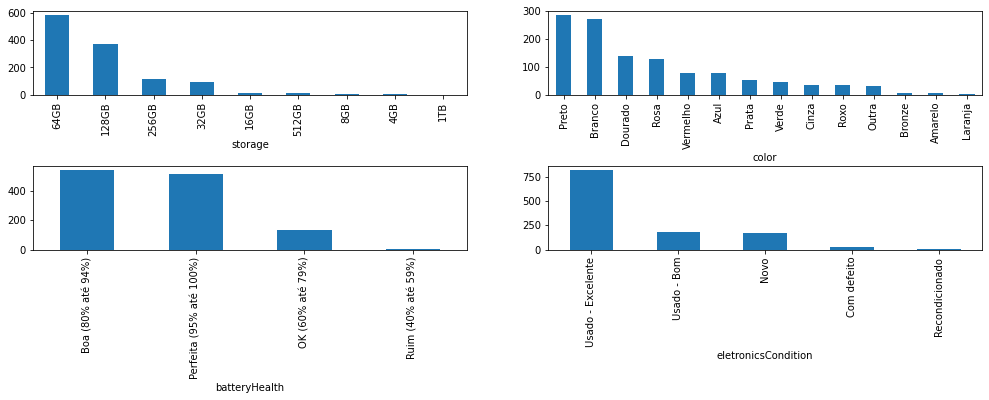

In [10]:
#
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
fig.tight_layout(pad=5)

_ = df['storage']            .value_counts().plot(kind='bar', ax=axes[0, 0])
_ = df['color']              .value_counts().plot(kind='bar', ax=axes[0, 1])
_ = df['batteryHealth']      .value_counts().plot(kind='bar', ax=axes[1, 0])
_ = df['eletronicsCondition'].value_counts().plot(kind='bar', ax=axes[1, 1])

#### Média

A maior parte das colunas do nosso _dataset_ têm natureza categórica. As colunas que possuem de fato uma interpretação numérica são: `price`, `pictures` (número de imagens no anúncio) e `subjectLength` (comprimento do  título do anúncio). Ainda assim elas tem escalas bem diferentes. Faz mais sentido agrupar os dados pelo modelo do produto.

In [11]:
df[['price', 'pictures', 'subjectLength']].mean()

price            2216.148117
pictures            4.144770
subjectLength      21.527197
dtype: float64

In [12]:
g_model = df.groupby(['eletronicsModel'])
g_storage = df.groupby(['storage'])
g_color = df.groupby(['color'])
g_region = df.groupby(['region'])

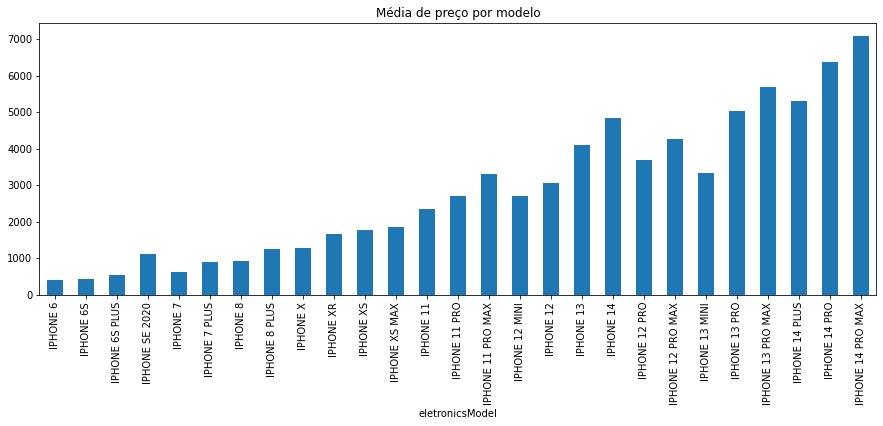

In [13]:
_ = g_model[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de preço por modelo')

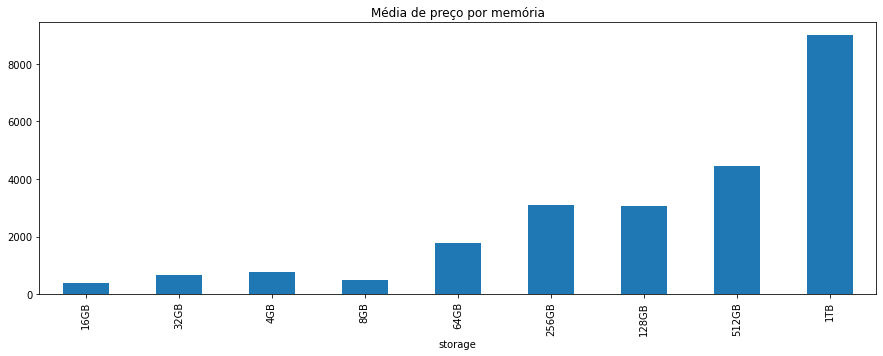

In [14]:
_ = g_storage[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de preço por memória')

In [15]:
print(f'Número de anúncios de 1TB: {(df.storage == "1TB").sum()}')

Número de anúncios de 1TB: 1


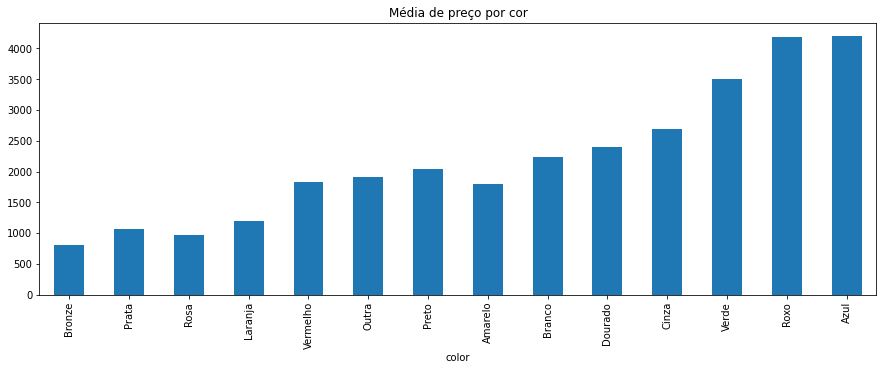

In [16]:
_ = g_color[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de preço por cor')

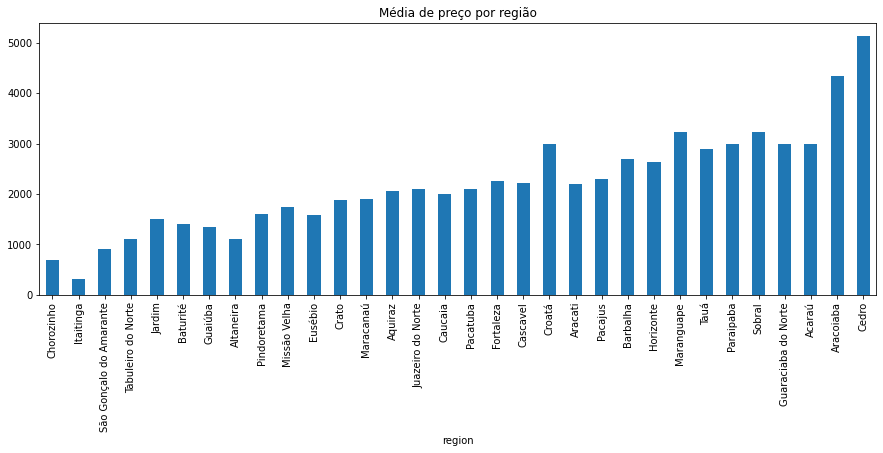

In [17]:
_ = g_region[['price', 'modelOrder']].mean().sort_values(['modelOrder'])['price'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de preço por região')

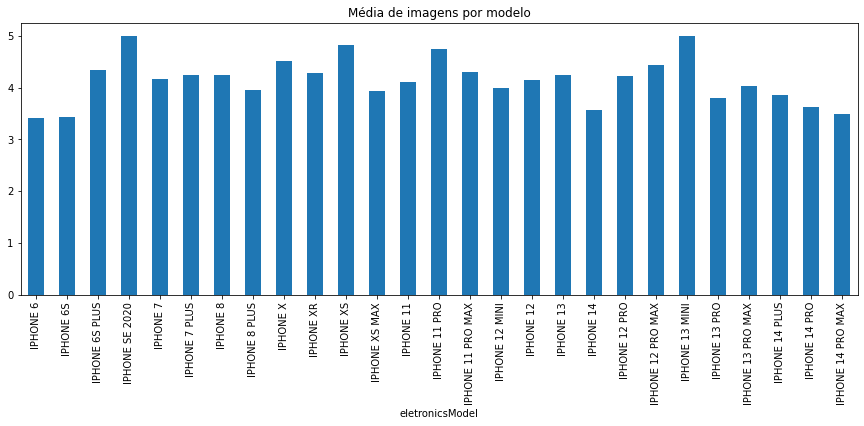

In [18]:
# Sem padrão aparente
_ = g_model[['pictures', 'modelOrder']].mean().sort_values(['modelOrder'])['pictures'] \
    .plot(kind='bar', figsize=(15, 5), title='Média de imagens por modelo')

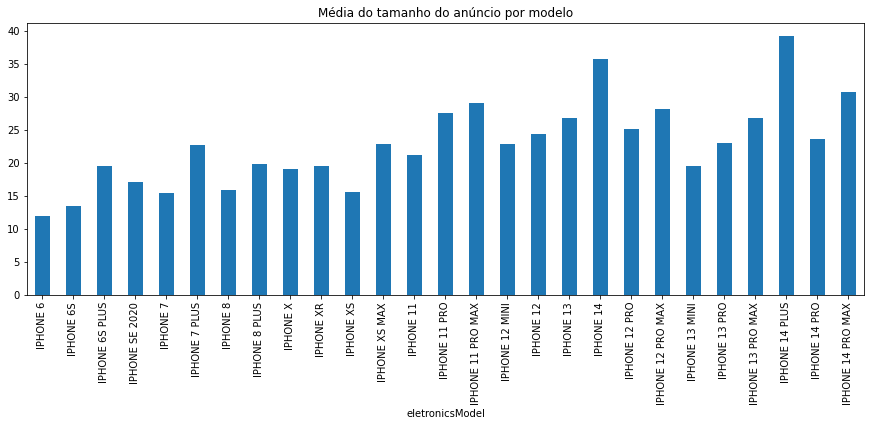

In [19]:
# Leve tendência ascendente ou lateralizada
_ = g_model[['subjectLength', 'modelOrder']].mean().sort_values(['modelOrder'])['subjectLength'] \
    .plot(kind='bar', figsize=(15, 5), title='Média do tamanho do anúncio por modelo')

### 2. Medidas de Variabilidade

In [20]:
df[['price', 'pictures', 'picturesPerc', 'subjectLength']].describe().loc[['mean', 'std']]

,price,pictures,picturesPerc,subjectLength
mean,2216.148117,4.144770,0.690795,21.527197
std,1582.206928,1.658427,0.276405,13.485269


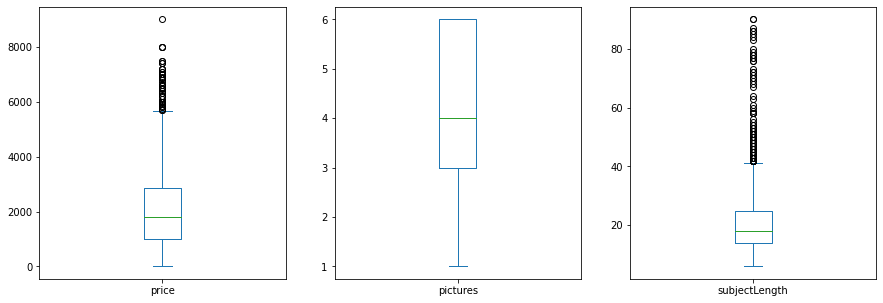

In [21]:
#
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# fig.tight_layout(pad=6)

_ = df.plot(column=['price'], kind='box', ax=axes[0])
_ = df.plot(column=['pictures'], kind='box', ax=axes[1])
_ = df.plot(column=['subjectLength'], kind='box', ax=axes[2])

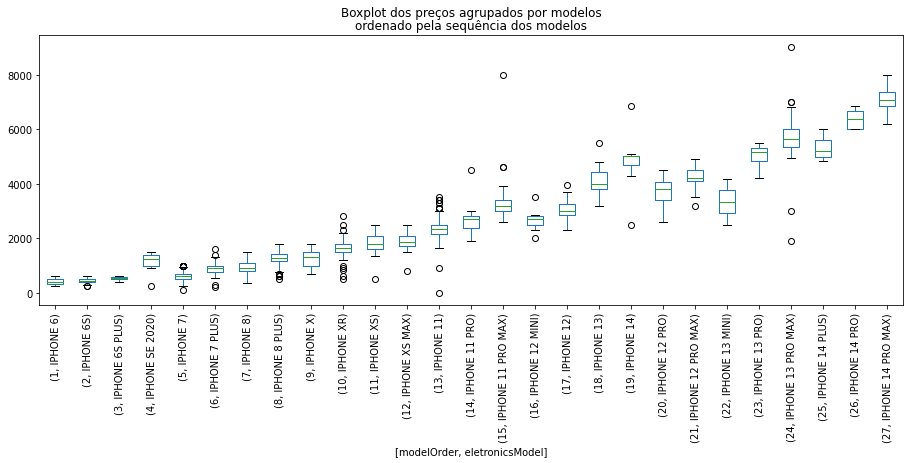

In [22]:
_ = df.boxplot(by=['modelOrder', 'eletronicsModel'], column=['price'], rot=90, grid=False, figsize=(15, 5))
_ = plt.title('ordenado pela sequência dos modelos')
_ = plt.suptitle('Boxplot dos preços agrupados por modelos') # that's what 

### 3. Tabela de Frequência e Histograma

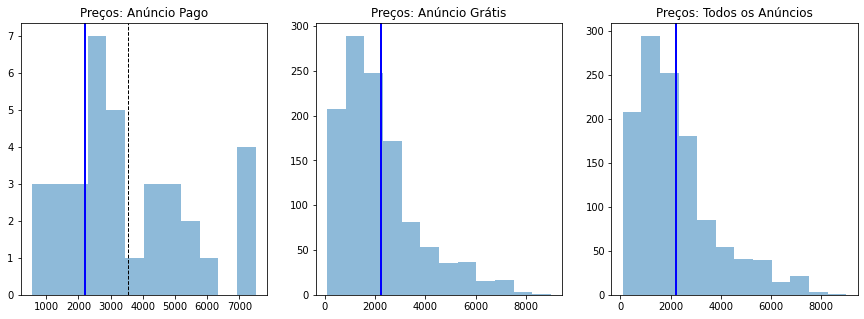

In [51]:
#
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#
paid = df[df.paidPromotion==True]
free = df[df.paidPromotion==False]

# Bins
k = math.ceil(1 + 3.3 * math.log10(df.shape[0]))

#
_ = paid.price.hist(bins=k, grid=False, ax=axes[0], alpha=0.5)
axes[0].axvline(paid.price.mean(), color='k', linestyle='dashed', linewidth=1)
axes[0].title.set_text("Preços: Anúncio Pago")

_ = free.price.hist(bins=k, grid=False, ax=axes[1], alpha=0.5)
axes[1].axvline(free.price.mean(), color='k', linestyle='dashed', linewidth=1)
axes[1].title.set_text("Preços: Anúncio Grátis")

_ = df.price.hist(bins=k, grid=False, ax=axes[2], alpha=0.5)
axes[2].title.set_text("Preços: Todos os Anúncios")

# Mostrando média geral em todos os plots
for i in range(3): 
    axes[i].axvline(df.price.mean(), color='b', linestyle='-', linewidth=2)


### 4. QQ-Plot

### 5. Correlações

In [24]:
df.columns

Index(['adDate', 'region', 'zipcode', 'areaCode', 'category', 'paidPromotion',
       'subject', 'eletronicsModel', 'storage', 'color', 'batteryHealth',
       'eletronicsCondition', 'price', 'pictures', 'sellerName', 'storageGB',
       'subjectLength', 'picturesPerc', 'modelOrder', 'macroRegion'],
      dtype='object')

In [25]:
# Removendo algumas colunas
df_ = df.drop(columns=[
    'adDate', 'region', 'zipcode', 'areaCode', 'category', 'paidPromotion', 'subject', 
    'eletronicsModel', 'storage', 'color', 'batteryHealth', 'eletronicsCondition', 
    'sellerName','subjectLength', 'picturesPerc', 'modelOrder', 'macroRegion',])

# One hot encoding
df_ = df_.join(pd.get_dummies(df.macroRegion))
df_ = df_.join(pd.get_dummies(df.eletronicsModel))
df_ = df_.join(pd.get_dummies(df.color))
df_ = df_.join(pd.get_dummies(df.batteryHealth))
df_ = df_.join(pd.get_dummies(df.eletronicsCondition))

#
correlation_matrix = df_.corr()

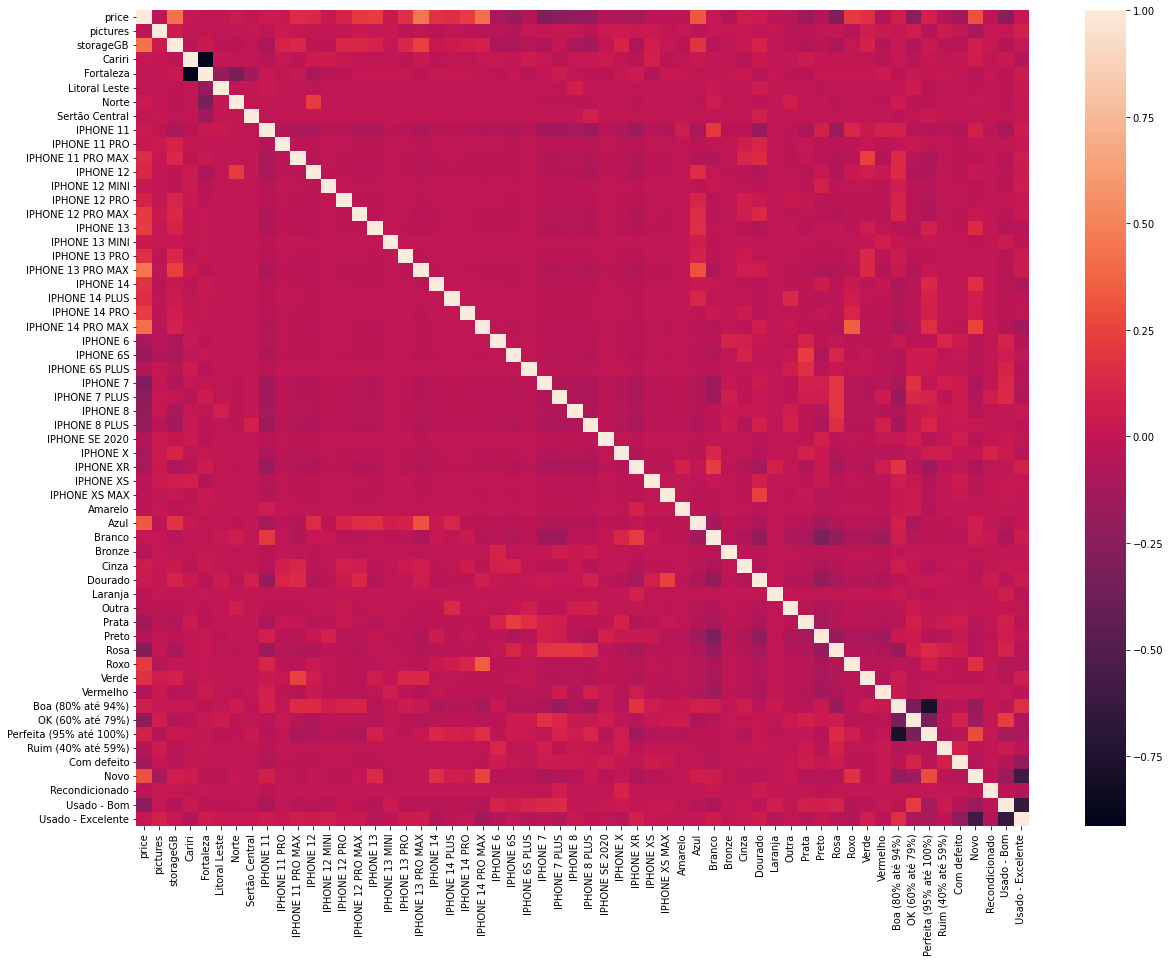

In [26]:
fig, ax = plt.subplots(figsize=(20, 15))
_ = sn.heatmap(correlation_matrix, ax=ax)

Mesmos analizando a correlação de forma visual, não é possível identificar correlações que sejam excelentes para separar bom os dados.

### 7. Teste de Normalidade

#### Price

In [183]:
bins = list(np.linspace(0, 9000, 31))
labels = bins[1:]

df['roundPrice'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
data = df[['roundPrice']].astype(float).rename(columns={'roundPrice': 'xi'})

In [191]:
# mean = data.xi.mean()
# std  = data.xi.std()

# # Frequência simples
# data = data.groupby(['xi']).size().reset_index(name='fi')

# # Frequência realtiva
# data['fri'] = data.fi/data.shape[0]

# # Frequência acumulada
# data['Fi'] = data.fi.cumsum()

# # Frequência acumulada realtiva
# data['Fri'] = data.Fi/data.shape[0]

# # Normalização
# data['Zi'] = data.apply(lambda x: (x.xi - p_mean)/p_std, axis=1)
# data.head()

# # P Value
# data['pVali'] = data['Zi'].apply(lambda z: 0.5 * (1 + scsp.erf(z / np.sqrt(2))))

# # D Negativo
# data['dneg'] = abs(data.pVali - data.Fri)

# # D Positivo
# data['dpos'] = data.Fri

# for i in range(data.shape[0]):
#     if i > 0:
#         data['dpos'].iloc[i] = data.pVali.iloc[i] - data.Fri.iloc[i-1]

# # Máximo valor entre dneg e dpos
# d = (data[['dneg','dpos']].max()).max()

# # P-Value
# alpha = 0.05
# p_value = ksone.ppf(1 - alpha/2, data.shape[0])
cond = '<' if d < p_value else '>='
res = '' if d < p_value else 'não'


print(f'D: {d:.4}')
print(f'p-value: {p_value:.4}')
print(f'{d:.4} {cond} {p_value:.4}: Os dados seguem uma distribuição normal')

#
data.head()

D: 43.22
p-value: 0.2544
43.222234163646796 >= 0.2543807270211716


,xi,fi,fri,Fi,Fri,Zi,pVali,dneg,dpos
0,300.0,15,0.555556,15,0.555556,-1.284781,0.099434,0.456121,0.555556
1,600.0,107,3.962963,122,4.518519,-1.094785,0.136805,4.381713,-0.418750
2,900.0,138,5.111111,260,9.629630,-0.904789,0.182789,9.446841,-4.335730
3,1200.0,127,4.703704,387,14.333333,-0.714793,0.237369,14.095965,-9.392261
4,1500.0,108,4.000000,495,18.333333,-0.524797,0.299862,18.033471,-14.033471


In [178]:
d = (data[['dneg','dpos']].max()).max()
d

0.4005430607529514

In [180]:
p_value

0.2543807270211716

### 8. Best Fit Distribution 

In [30]:
price.groupby(['price']).size().reset_index('F')

KeyError: 'Requested level (F) does not match index name (price)'